### 0. import library

In [2]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

### 1. generate data

In [3]:
def sythetic_data(w, b, num_examples):
    """生成 y = Wx+b+噪声

    Args:
        w (_type_): weight
        b (_type_): bias
        num_examples (_type_): 样本个数
    """
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01,y.shape)
    return X, y.reshape((-1, 1))

In [4]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = sythetic_data(true_w, true_b, 1000)

In [5]:
print(f'features: {features[0]}\nlabel: {labels[0]}')

features: tensor([ 1.5413, -1.2084])
label: tensor([11.3918])


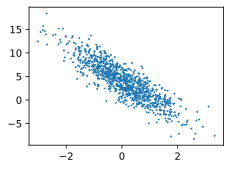

In [6]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)], labels, 1)

### 3. read data
主要是每次都是抽取小批量的样本（batch），因此弄一个generator一次读取指定大小的数据。

In [9]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # it works in place
    for i in range(0, num_examples, batch_size):
        batch_indices = indices[i:min(i + batch_size, num_examples)]
        yield features[batch_indices],labels[batch_indices]

In [10]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.4662, -0.8455],
        [-1.3272,  1.3754],
        [-0.7190, -1.0703],
        [ 0.5188, -0.9812],
        [ 0.9961, -0.0519],
        [ 0.8087,  1.5446],
        [ 1.0297, -0.8652],
        [ 1.9654, -0.8768],
        [-1.0411,  1.2427],
        [ 0.7297, -0.5717]]) 
 tensor([[ 8.0042],
        [-3.1211],
        [ 6.4054],
        [ 8.5690],
        [ 6.3527],
        [ 0.5747],
        [ 9.2079],
        [11.0953],
        [-2.0988],
        [ 7.6180]])


### 4. initailize paramters

In [11]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# 这里requires_grad是True是因为后面loss要对他们进行求导。

### 5. define the model

In [12]:
def linreg(X, w, b): 
    return torch.matmul(X, w) + b

### 6. define loss function

In [13]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

### 7. optimize algorithm

In [14]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size # 这里为什么要 / batch_size 等下看
            param.grad.zero_()

### 8. train loop

In [15]:
# define hyper parameters first!!!
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [16]:
# the real train loop
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        # now X, y are a batch of data
        # we calculate the loss for the whole batch
        l = loss(net(X, w, b), y)
        l.sum().backward() # call this will update the gradient
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch: {epoch + 1}, loss: {float(train_l.mean()):f}')

epoch: 1, loss: 0.048538
epoch: 2, loss: 0.000202
epoch: 3, loss: 0.000050
